In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df =pd.read_csv('https://raw.githubusercontent.com/JamesLo94/schulich_data_science/main/0514/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df["Embarked"] = df["Embarked"].replace("S", 1)
df["Embarked"] = df["Embarked"].replace("C", 2)
df["Embarked"] = df["Embarked"].replace("Q", 3)
# 这里我将不同的登船点，调整为数字

In [52]:
df.info()
# 可以知道有一些variable的类型是object，这些是无法运行corr()的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.362205
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [ ]:
df[df["Survived"] == 1].describe()
# 生存着342人

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000,340.00000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408,1.45000
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998,0.65209
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,1.00000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000,1.00000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,1.00000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000,2.00000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,3.00000


In [ ]:
df[df["Survived"] == 0].describe()
# 死亡人数549人

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887,1.307832
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207,0.620478
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200,1.000000
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000,1.000000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000,1.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,3.000000


In [ ]:
numeric_column = df.select_dtypes(include = ["int","float"]).columns
df[numeric_column].corr()
#这里面可以发现，生存与否和class有关，头等舱的生存少
# 看起来和登船点也有相关，但本来基数就大，可能没有因果关系

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.043835
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.012186,-0.060606,-0.079320,0.063462,1.000000


In [57]:
df[ (df["Survived"] == 1) & (df["Pclass"] == 3)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,119.000000,119.0,119.0,85.000000,119.000000,119.000000,119.000000,119.000000
mean,394.058824,1.0,3.0,20.646118,0.436975,0.420168,13.694887,1.663866
std,264.680245,0.0,0.0,11.995047,0.829934,0.807757,10.692993,0.826236
min,3.000000,1.0,3.0,0.420000,0.000000,0.000000,0.000000,1.000000
25%,169.500000,1.0,3.0,14.000000,0.000000,0.000000,7.775000,1.000000
50%,359.000000,1.0,3.0,22.000000,0.000000,0.000000,8.516700,1.000000
75%,633.500000,1.0,3.0,29.000000,1.000000,1.000000,15.875000,2.000000
max,876.000000,1.0,3.0,63.000000,4.000000,5.000000,56.495800,3.000000


In [58]:
df[ (df["Survived"] == 0) & (df["Pclass"] == 3)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,372.000000,372.0,372.0,270.000000,372.000000,372.000000,372.000000,372.000000
mean,453.580645,0.0,3.0,26.555556,0.672043,0.384409,13.669364,1.352151
std,263.090509,0.0,0.0,12.334882,1.504700,0.914144,12.118338,0.686544
min,1.000000,0.0,3.0,1.000000,0.000000,0.000000,0.000000,1.000000
25%,206.750000,0.0,3.0,19.000000,0.000000,0.000000,7.750000,1.000000
50%,470.000000,0.0,3.0,25.000000,0.000000,0.000000,8.050000,1.000000
75%,679.500000,0.0,3.0,33.000000,1.000000,0.000000,15.136450,1.000000
max,891.000000,0.0,3.0,74.000000,8.000000,6.000000,69.550000,3.000000


<Axes: xlabel='Age', ylabel='Count'>

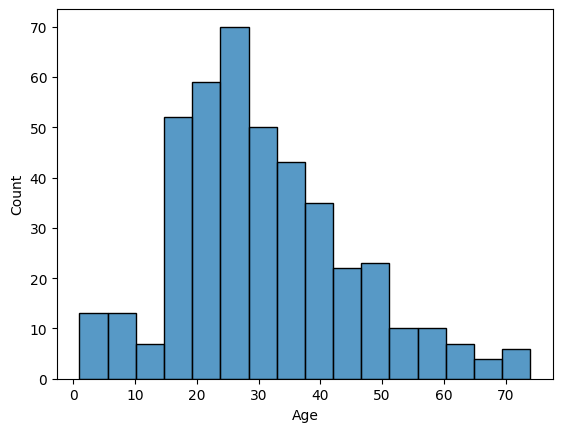

In [63]:
sns.histplot(df[df["Survived"] == 0]["Age"])

<Axes: xlabel='Age', ylabel='Count'>

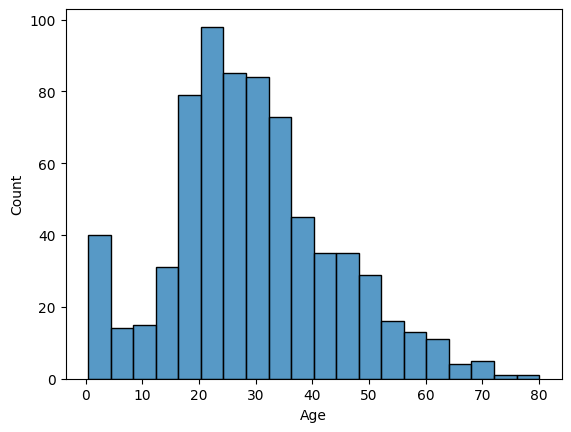

In [61]:
sns.histplot(df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

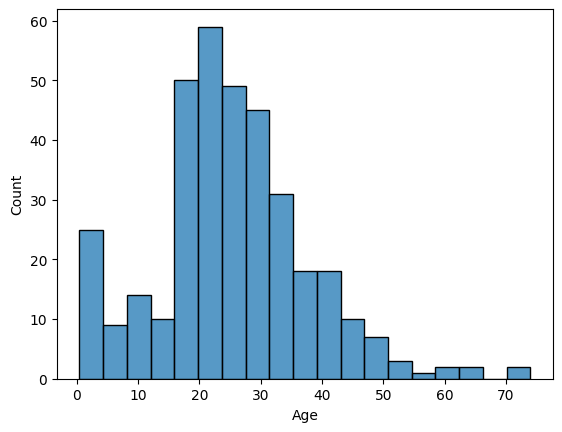

In [65]:
sns.histplot(df[df["Pclass"] == 3]["Age"])